## Spotify Sequential Skip Prediction Data EDA
_forged by Prashik Raut_

Performed exploratory data analysis on Spotify data.

In [25]:
# pip install klib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

%matplotlib inline
sns.set_theme()
plt.rcParams["figure.figsize"] = 8, 5
pd.set_option("display.max_columns", None)

In [2]:
behavior_features = pd.read_csv("log_mini.csv") 
acoustic_features = pd.read_csv("tf_mini.csv") 

In [3]:
print("Shape of behavior_features:  ", behavior_features.shape[0], "×", behavior_features.shape[1])
print("Shape of acoustic_features:  ", acoustic_features.shape[0], "×", acoustic_features.shape[1])

Shape of behavior_features:   167880 × 21
Shape of acoustic_features:   50704 × 30


__Cleaning Up the acoustic_features Data...__

In [4]:
acoustic_features.head(3)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496


In [5]:
acoustic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [6]:
acoustic_features.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,5.070400e+04,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,7.058671e-02,5.269111,0.205520,-7.519316,0.547603,0.391874,0.122998,121.576396,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,2.142261e-01,3.597578,0.176486,3.927858,0.223803,0.207116,0.136022,29.786741,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,1.084167e-08,2.000000,0.098249,-8.942000,0.366652,0.225742,0.038028,97.158997,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,2.211650e-06,5.000000,0.131403,-6.688000,0.571023,0.364057,0.061794,120.115498,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,7.654784e-04,8.000000,0.262823,-5.043000,0.729537,0.533131,0.160202,141.014008,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


__Examining Acousticness & Speechiness__

Acousticness: This value describes how acoustic (sense of relating to sound) a song is. A score of 1.0 means the song is most likely to be an acoustic one.

Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.

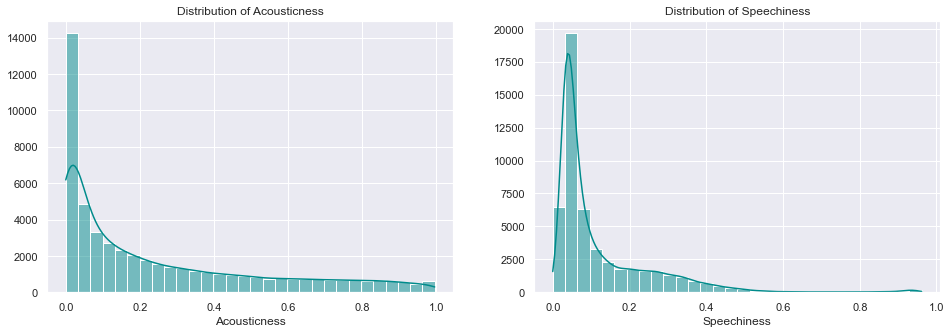

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data = acoustic_features, x = "acousticness", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Acousticness")
plt.title("Distribution of Acousticness")

plt.subplot(1,2,2)
sns.histplot(data = acoustic_features, x = "speechiness", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Speechiness")
plt.title("Distribution of Speechiness")
plt.show()

__Examining Danceability & Instrumentalness__

Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.

Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

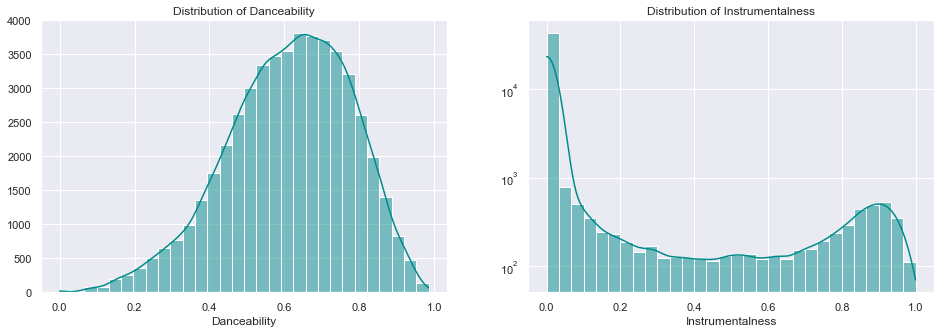

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data = acoustic_features, x = "danceability", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Danceability")
plt.title("Distribution of Danceability")

plt.subplot(1,2,2)
sns.histplot(data = acoustic_features, x = "instrumentalness", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Instrumentalness")
plt.yscale("log")
plt.title("Distribution of Instrumentalness")
plt.show()

__Examining Liveness & Valence__

Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.

Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

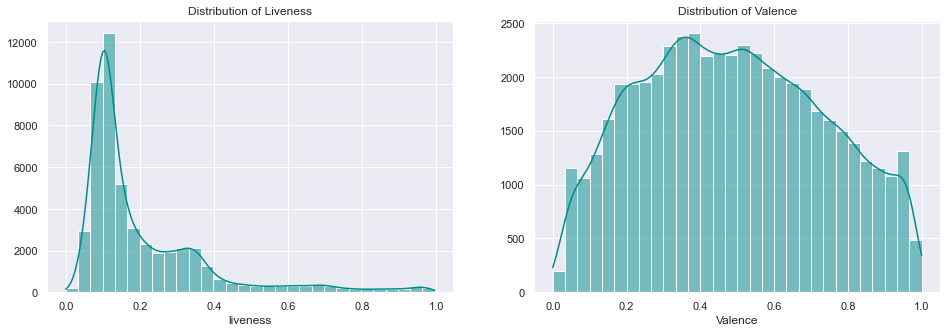

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data = acoustic_features, x = "liveness", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("liveness")
plt.title("Distribution of Liveness")

plt.subplot(1,2,2)
sns.histplot(data = acoustic_features, x = "valence", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Valence")
plt.title("Distribution of Valence")
plt.show()

__Examining Energy & Popularity__

Energy: “Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.

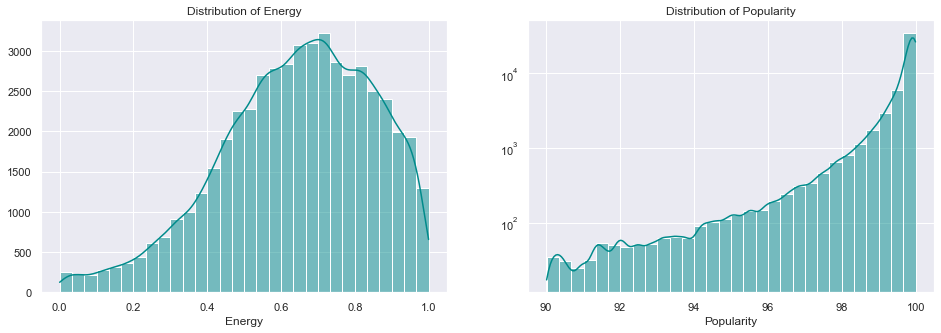

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data = acoustic_features, x = "energy", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Energy")
plt.title("Distribution of Energy")

plt.subplot(1,2,2)
sns.histplot(data = acoustic_features, x = "us_popularity_estimate", bins = 30, kde = True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Popularity")
plt.yscale("log")
plt.title("Distribution of Popularity")
plt.show()

__.....................................................__

                                 
Out of 30, 5 features' datatype is not float64, I'm going to examine them one by one except track_id.

In [11]:
acoustic_features[[featr for featr in acoustic_features.columns if acoustic_features[featr].dtype != "float64"]].head()

,track_id,release_year,key,mode,time_signature
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,1950,0,major,4
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,1950,0,major,3
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,1951,0,minor,4
3,t_070a63a0-744a-434e-9913-a97b02926a29,1951,0,major,4
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,1951,0,major,4


__Examining Release Year__

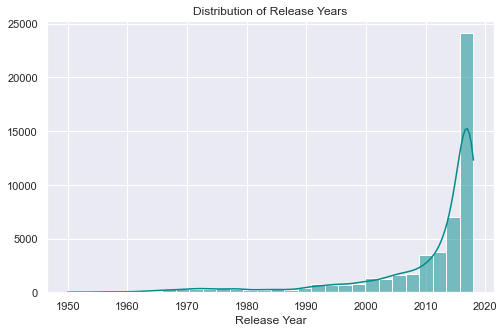

In [12]:
sns.histplot(data = acoustic_features, x = "release_year", bins = 30, kde =True, color = "darkcyan")
plt.ylabel("")
plt.xlabel("Release Year")
plt.title("Distribution of Release Years")
plt.show()

__Examining Mode__

In [13]:
acoustic_features["mode"].value_counts()

major    32555
minor    18149
Name: mode, dtype: int64

In [14]:
acoustic_features["mode"].value_counts() / acoustic_features["mode"].count()

major    0.64206
minor    0.35794
Name: mode, dtype: float64

Here we can observe that __mode__ is the only feature that seems like it needs to be changed. Currently, it is of type __string__ and can be easily converted into the integer type.

In [15]:
acoustic_features = pd.get_dummies(acoustic_features, columns = ["mode"])
acoustic_features.drop(columns = ["mode_minor"], inplace = True)

In [16]:
acoustic_features["mode_major"] = acoustic_features["mode_major"].astype(np.int64)

__Examining Key__

In [17]:
print(acoustic_features["key"].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


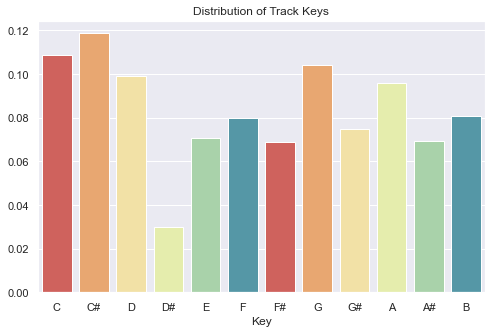

In [18]:
# https://en.wikipedia.org/wiki/Pitch_class
keys = acoustic_features["key"].value_counts().sort_index()
sns.barplot(
    x = [
        "C",
        "C#",
        "D",
        "D#",
        "E",
        "F",
        "F#",
        "G",
        "G#",
        "A",
        "A#",
        "B"
    ],
    y = keys.values / keys.sum(),
    palette = sns.color_palette("Spectral")
)
plt.title("Distribution of Track Keys")
plt.xlabel("Key");
plt.show()

__Examining Time Signature__

In [19]:
print(acoustic_features["time_signature"].unique())

[4 3 5 1 0]


In [20]:
ts = acoustic_features["time_signature"].value_counts().sort_index()
ts / ts.sum()

0    0.000552
1    0.008145
3    0.076858
4    0.897779
5    0.016665
Name: time_signature, dtype: float64

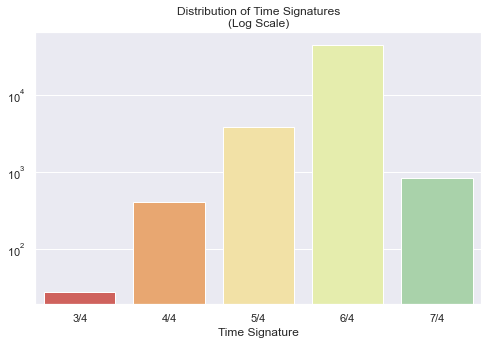

In [21]:
plt.figure()
sns.barplot( 
    x = [f"{i}/4" for i in range(3,8)],
    y = ts.values,
    palette = sns.color_palette("Spectral")
)
plt.title("Distribution of Time Signatures\n(Log Scale)")
plt.xlabel("Time Signature")
plt.yscale("log");
plt.show()

__Handling Missing Values in Data__

In [22]:
features_with_na = []

for feature in acoustic_features.columns:
    if acoustic_features[feature].isnull().sum()>=1:
        features_with_na.append(feature)
        
features_with_na        

[]

There are no null values in the dataset.       

__Skewness Value Plot__

In [23]:
from scipy.stats import skew

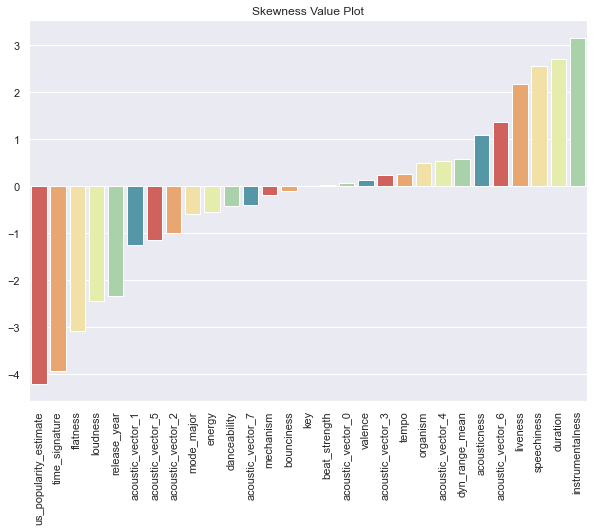

In [24]:
skewed_features_vals=[]

for feature in acoustic_features.columns:
    if(feature == "track_id"):
        continue
    skewed_features_vals.append([skew(acoustic_features[feature]), feature])    
    

skewed_features_vals.sort()

d = {"feature":[], "skew_value":[]}
for x in skewed_features_vals:
    d["feature"].append(x[1])
    d["skew_value"].append(x[0])
    
plt.figure(figsize=(10,7))
sns.barplot(x = d["feature"], y = d["skew_value"], palette = sns.color_palette("Spectral"))
plt.xticks(rotation=90)
plt.title("Skewness Value Plot")
plt.show()

 __Distribution Plots, Pairplots, Correlation Between Acoustic Vectors__

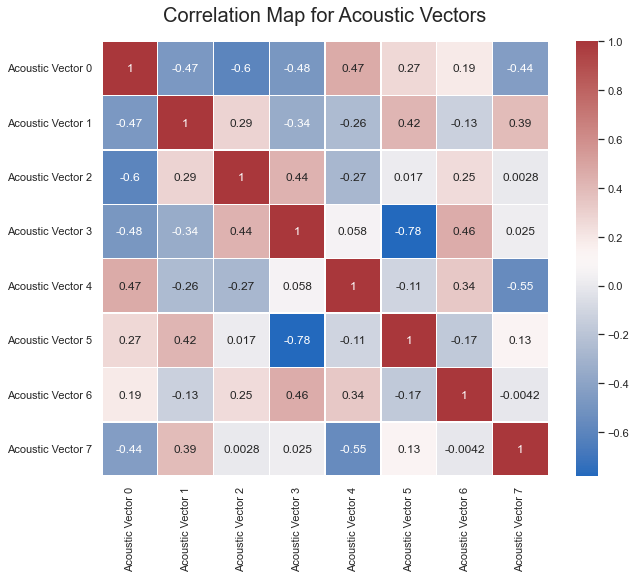

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(
    acoustic_features[[
        "acoustic_vector_0",
        "acoustic_vector_1",
        "acoustic_vector_2",
        "acoustic_vector_3",
        "acoustic_vector_4",
        "acoustic_vector_5",
        "acoustic_vector_6",
        "acoustic_vector_7"
    ]].rename(
        columns = {f"acoustic_vector_{i}" : f"Acoustic Vector {i}" for i in range(8)}
    ).corr(),
    linewidths = .4, 
    cmap = sns.color_palette("vlag", as_cmap=True),
    annot=True
)
plt.title(
    "Correlation Map for Acoustic Vectors",
    fontsize = 20,
    pad = 20
)
plt.xlabel("")
plt.ylabel("")
plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


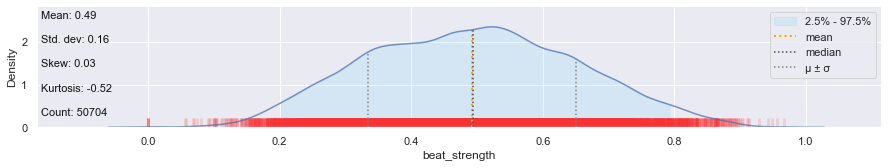

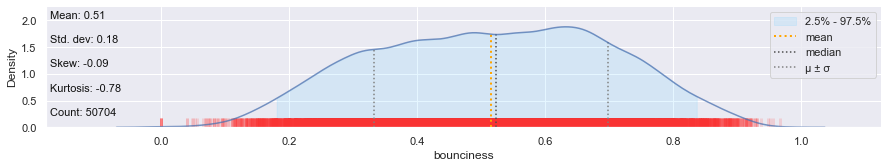

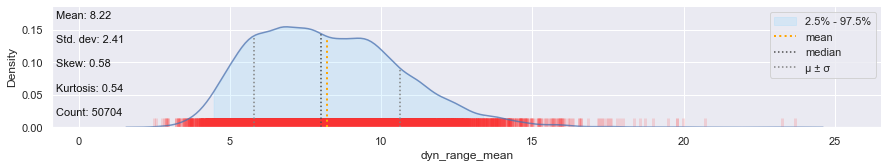

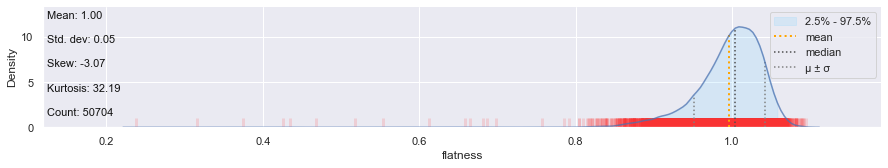

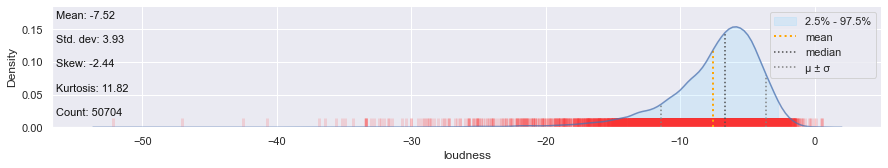

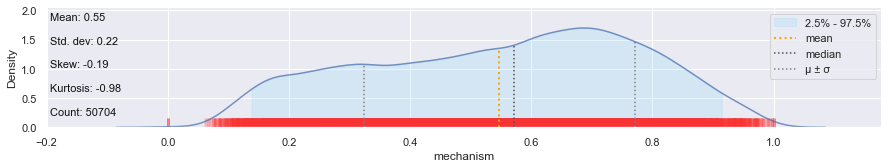

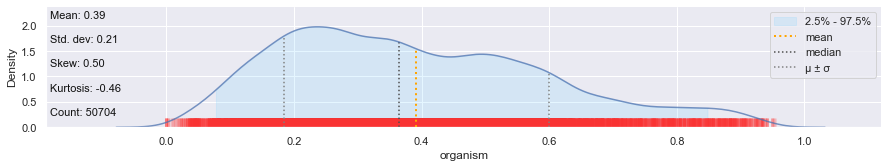

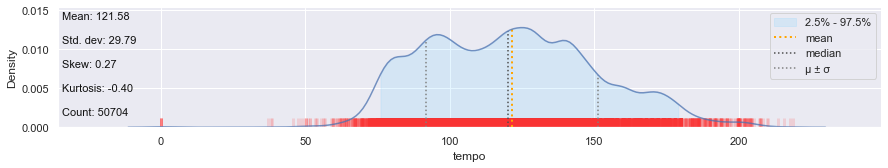

In [310]:
cols = ['beat_strength','bounciness', 'dyn_range_mean', 'flatness', 'loudness', 'mechanism', 'organism', 'tempo']
klib.dist_plot(acoustic_features[cols])

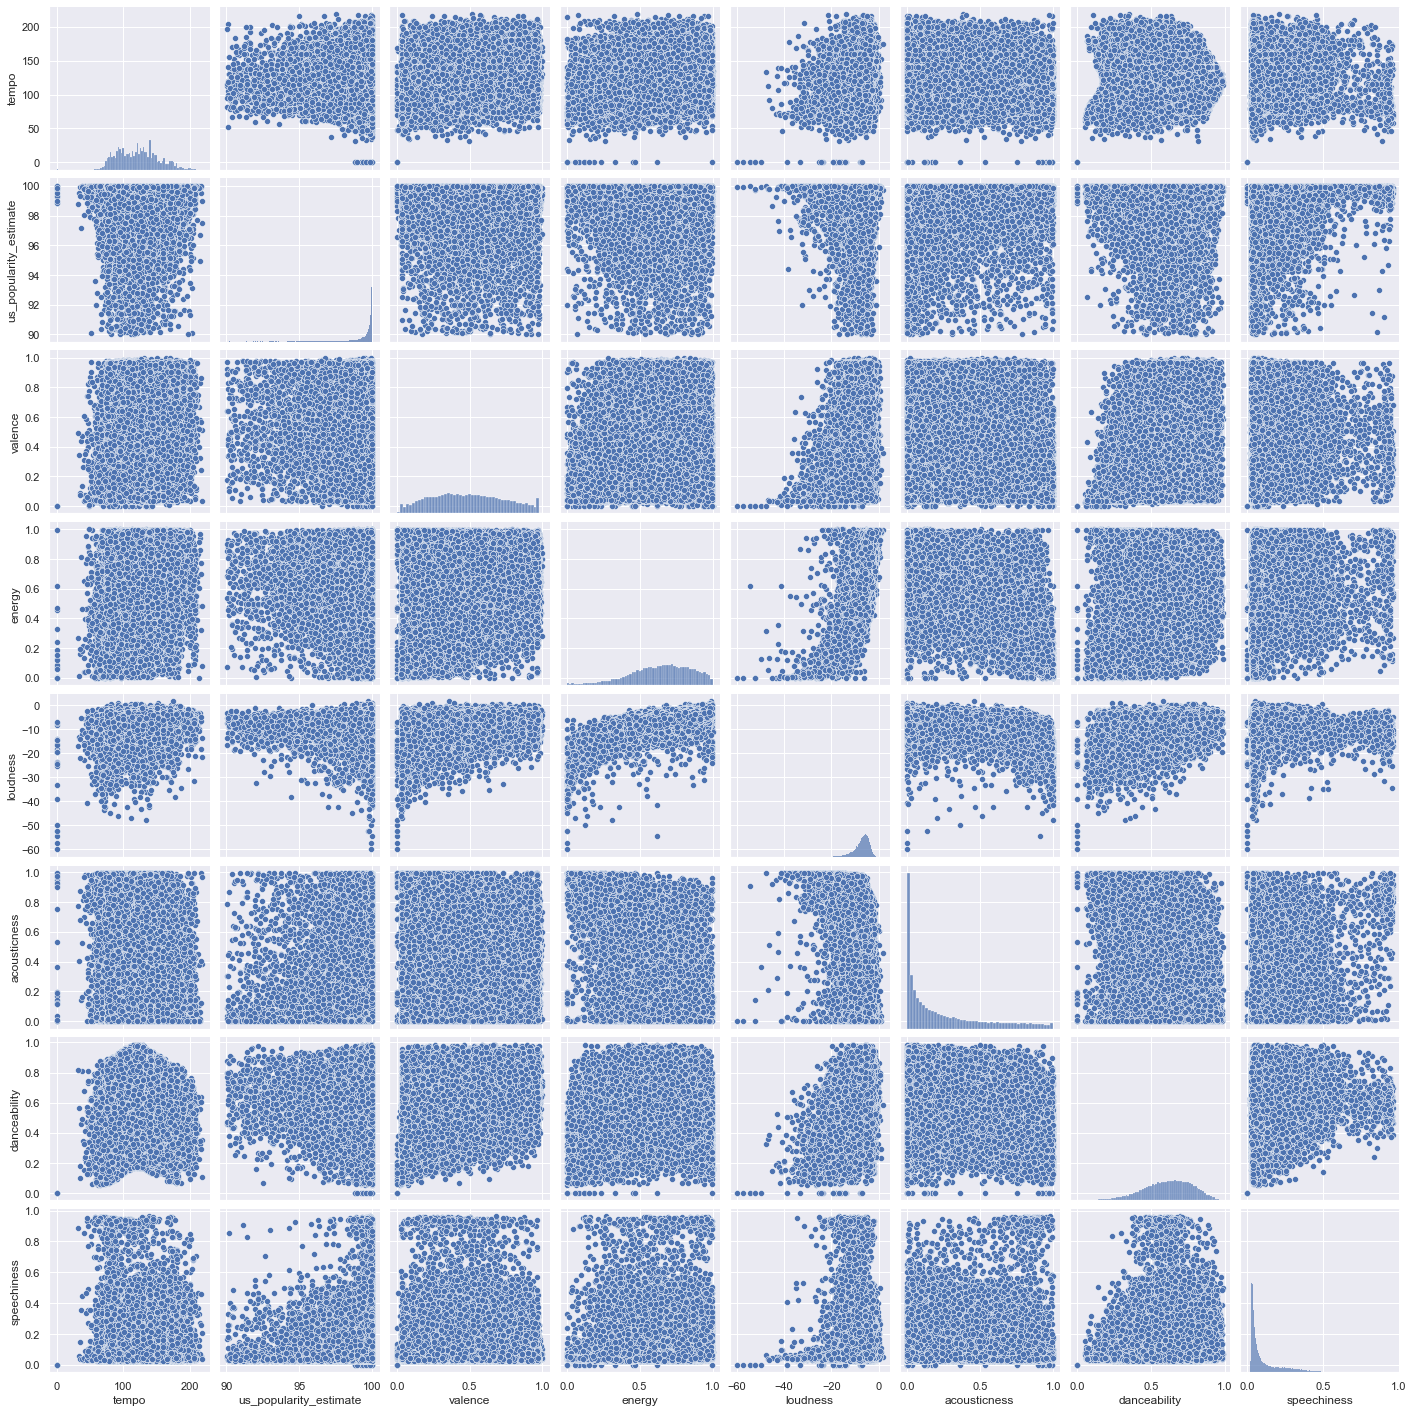

In [175]:
sns.pairplot(
    acoustic_features,
    x_vars=["tempo", "us_popularity_estimate", "valence", "energy", "loudness", "acousticness", "danceability", "speechiness"],
    y_vars=["tempo", "us_popularity_estimate", "valence", "energy", "loudness", "acousticness", "danceability", "speechiness"]
) 

__Feature Scaling & Normalization__

In [51]:
features_to_scale = []

for feature in acoustic_features.columns:
    if feature != "track_id":
        features_to_scale.append(feature)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(acoustic_features[features_to_scale])

MinMaxScaler()

In [53]:
new_acoustic_features = pd.concat([acoustic_features[["track_id"]].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(acoustic_features[features_to_scale]), columns = features_to_scale)],
                    axis = 1)

In [54]:
new_acoustic_features.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,mode_major
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,0.045338,0.000000,0.997537,0.459974,0.524522,0.519179,0.405875,0.232258,0.817810,0.819200,3.256285e-06,0.0,0.132621,0.791154,0.386100,0.562795,0.083196,0.760082,0.8,0.935521,0.530185,0.354452,0.533069,0.615072,0.967127,0.550818,0.256542,0.140865,1.0
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,0.089706,0.000000,0.996937,0.920140,0.423278,0.560904,0.498740,0.281311,0.154277,0.940845,8.349875e-12,0.0,0.163895,0.751111,0.125000,0.930923,0.087244,0.435429,0.6,0.359678,0.617285,0.123334,0.645361,0.826081,0.727899,0.394562,0.307239,0.211411,1.0
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,0.074429,0.014706,0.960180,0.816315,0.430010,0.522604,0.499136,0.258749,0.358857,0.910311,2.929237e-10,0.0,0.090453,0.802771,0.200669,0.837675,0.040334,0.480795,0.8,0.726776,0.556952,0.179595,0.799604,0.731341,0.748303,0.570567,0.204794,0.254787,0.0
3,t_070a63a0-744a-434e-9913-a97b02926a29,0.082712,0.014706,0.966439,0.398530,0.404813,0.370135,0.560664,0.184503,0.514649,0.883907,3.983736e-11,0.0,0.362280,0.794497,0.427152,0.512050,0.039876,0.545954,0.8,0.859083,0.565430,0.430533,0.515945,0.485926,0.854102,0.628273,0.276218,0.203441,1.0
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,0.193194,0.014706,0.999175,0.731908,0.374921,0.344559,0.490424,0.179412,0.721531,0.885473,2.543413e-10,0.0,0.189873,0.862576,0.281250,0.752126,0.033329,0.435429,0.8,0.562348,0.610584,0.417373,0.425344,0.411285,0.907282,0.700229,0.201803,0.244448,1.0


In [55]:
print("new_acoustic_features shape:  ", new_acoustic_features.shape)

new_acoustic_features shape:   (50704, 30)


__Cleaning Up the behavior_features Data...__

In [56]:
behavior_features.head(3)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [57]:
behavior_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [58]:
behavior_features.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


__Handling Missing Values in Data__

In [59]:
features_with_na = []

for feature in acoustic_features.columns:
    if acoustic_features[feature].isnull().sum()>=1:
        features_with_na.append(feature)
        
features_with_na  

[]

There are no null values in the dataset.

__Distribution Plots__

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


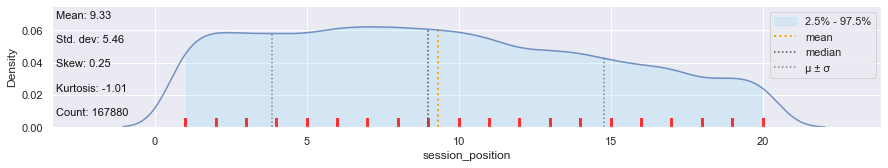

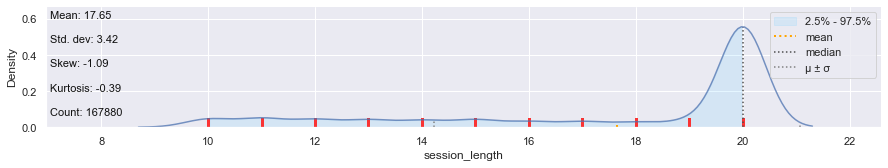

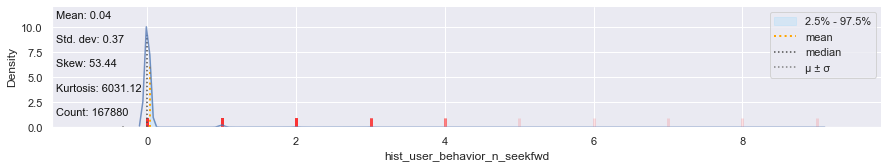

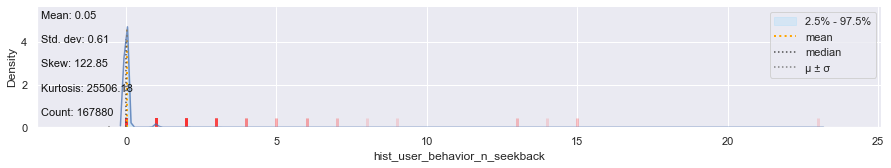

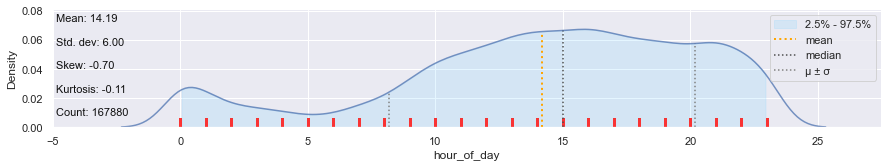

In [60]:
klib.dist_plot(behavior_features)

__Handling Bool Features__

In [61]:
features_with_bool = []

for feature in behavior_features.columns:
    if behavior_features[feature].dtype == bool:
        features_with_bool.append(feature)
        
features_with_bool       

['skip_1',
 'skip_2',
 'skip_3',
 'not_skipped',
 'hist_user_behavior_is_shuffle',
 'premium']

In [62]:
for feature in features_with_bool:
    behavior_features[feature] = behavior_features[feature] * 1

__skip_2 vs All Remaining Features (Correlation)__

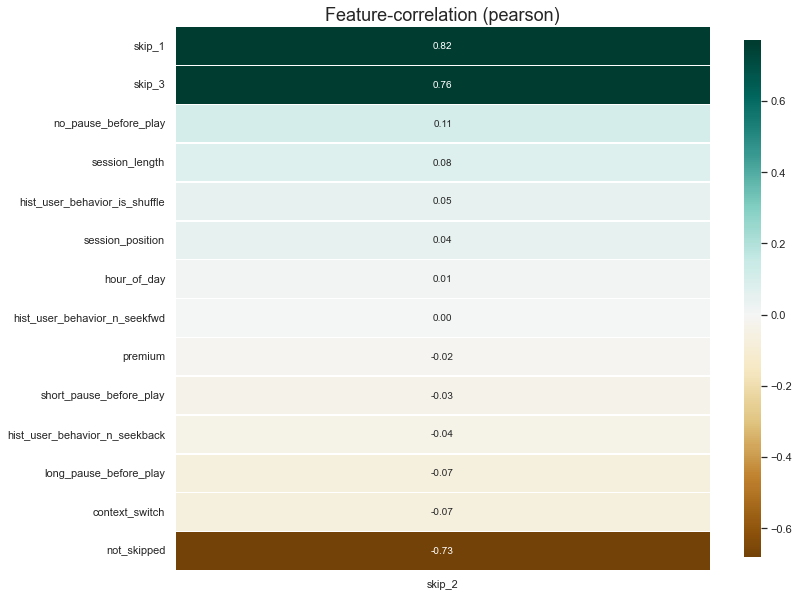

In [63]:
klib.corr_plot(behavior_features, target="skip_2")

__premium vs All Remaining Features (Correlation)__

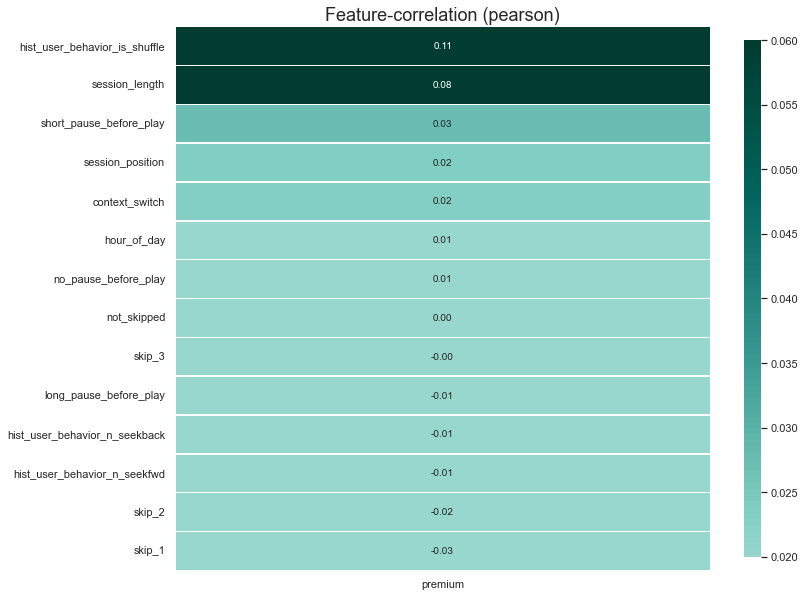

In [64]:
klib.corr_plot(behavior_features, target="premium")

__Correlation Map & Pairplots__

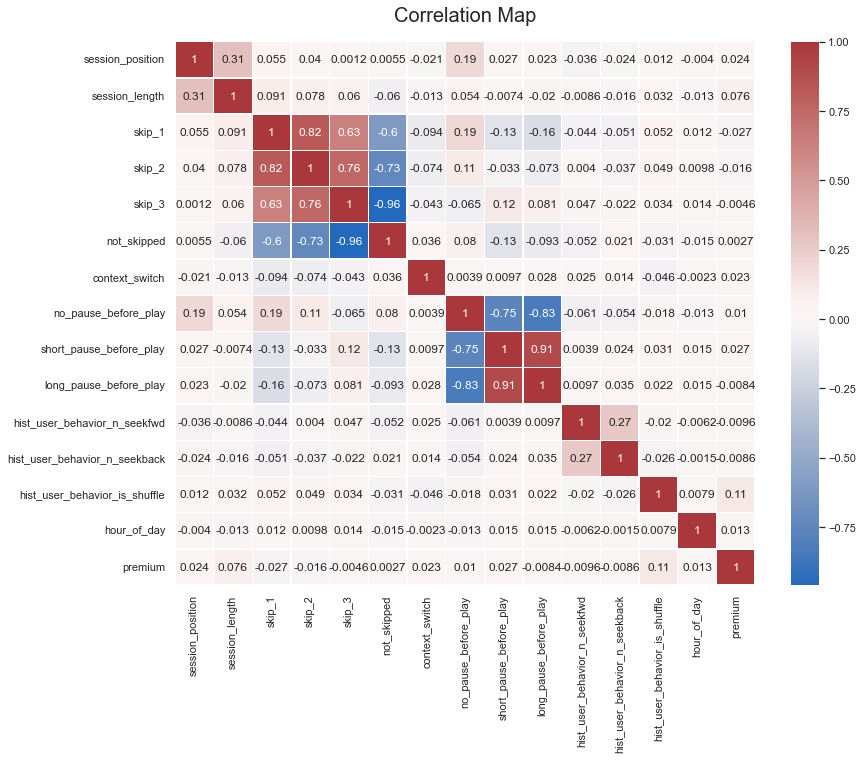

In [65]:
plt.figure(figsize = (13, 10))
sns.heatmap(
    behavior_features.corr(),
    linewidths = .4, 
    cmap = sns.color_palette("vlag", as_cmap=True), 
    annot=True
)
plt.title(
    "Correlation Map",
    fontsize = 20,
    pad = 20
)
plt.xlabel("")
plt.ylabel("")
plt.show()

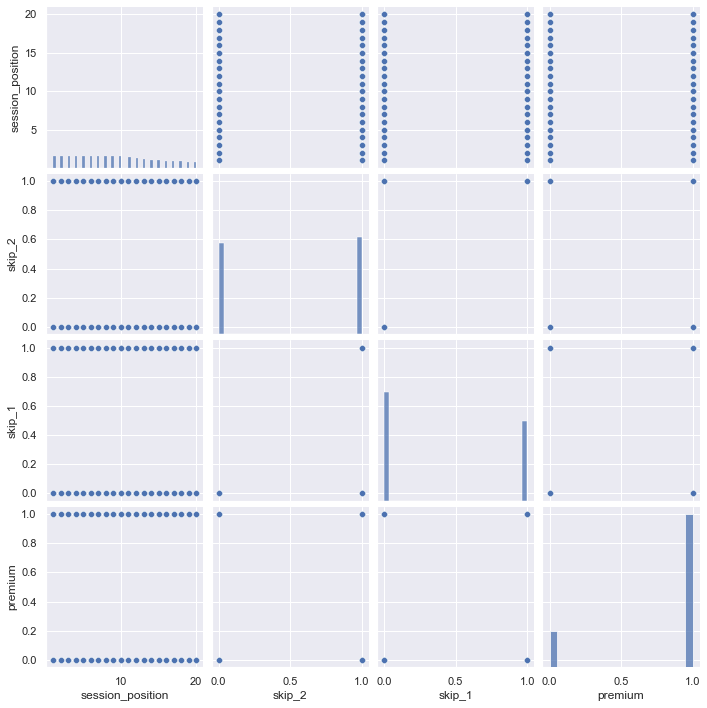

In [141]:
sns.pairplot(
    behavior_features,
    x_vars=["session_position", "skip_2", "skip_1",
            "premium"],
    y_vars=["session_position", "skip_2", "skip_1",
            "premium"]
) 

__Categorical Features & One Hot Encoding__

In [66]:
categorical_features = []

for feature in behavior_features:
    if behavior_features[feature].dtype == 'O' and feature != "session_id" and feature != "track_id_clean" and feature != "date":
        categorical_features.append(feature)

categorical_features

['context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end']

In [67]:
for feature in categorical_features:
    print(feature, len(pd.unique(behavior_features[feature])))

context_type 6
hist_user_behavior_reason_start 9
hist_user_behavior_reason_end 7


In [68]:
behavior_features = pd.get_dummies(behavior_features, columns = categorical_features, drop_first = True)

__Handling Date Feature__

In [69]:
split_date = list(behavior_features["date"])
week_day = []
month = []

d = {0:"sunday", 1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday", 6:"saturday"}

for date in split_date:
    lst = date.split('-')
    C = int(lst[0][:2])
    D = int(lst[0][2:])
    k = int(lst[2])
    m = int(lst[1])
    month.append(m);
    day = k + ((13 * m - 1) / 5) + D + (D / 4) + (C / 4) - 2 * C
    
    if day >= 0:
        week_day.append(d[int(day % 7)])
    else:
        tt = int(ceil(abs(day) / 7) * 7 - abs(day));  
        week_day.append(d[tt])
        
               
behavior_features["week_day"] = week_day
behavior_features.drop(columns = ["date"], inplace = True)
behavior_features = pd.get_dummies(behavior_features, columns = ["week_day"], drop_first = True)

__Outliers & Boxplots__

In [70]:
def outliers_cntfix(data, flag): 
    lst_data=list(data)
    lst_data.sort()
    Q1, Q3=np.percentile(lst_data, [25, 75]) # 1st quartile, 3rd quartile
    IQR = Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    if flag == "cnt":
        cnt=0
        for x in lst_data:
            if x > upper_bound or x < lower_bound:
                cnt += 1  
        return cnt
    
    for i in range(len(lst_data)):
        if lst_data[i] > upper_bound:
            lst_data[i] = upper_bound      
        elif lst_data[i] < lower_bound:
            lst_data[i] = lower_bound
    
    
    return lst_data

% outliers:   0.02778174886823922


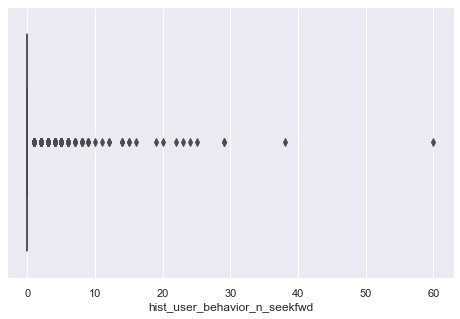

% outliers:   0.030825589706933523


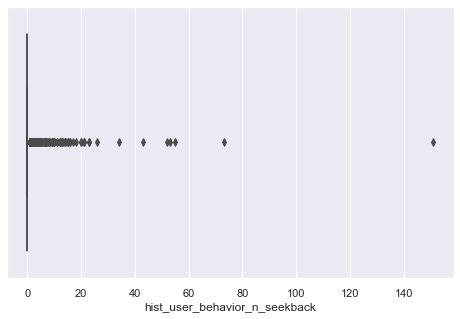

In [71]:
cols = ['hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback']

for feature in cols:
    print("% outliers:  ", outliers_cntfix(behavior_features[feature], "cnt")/behavior_features[feature].count())
    sns.boxplot(x=behavior_features[feature])
    plt.show()

In [72]:
behavior_features['hist_user_behavior_n_seekfwd'] = outliers_cntfix(behavior_features['hist_user_behavior_n_seekfwd'], "fix")
behavior_features['hist_user_behavior_n_seekback'] = outliers_cntfix(behavior_features['hist_user_behavior_n_seekback'], "fix")

__Skewness Value Plot__

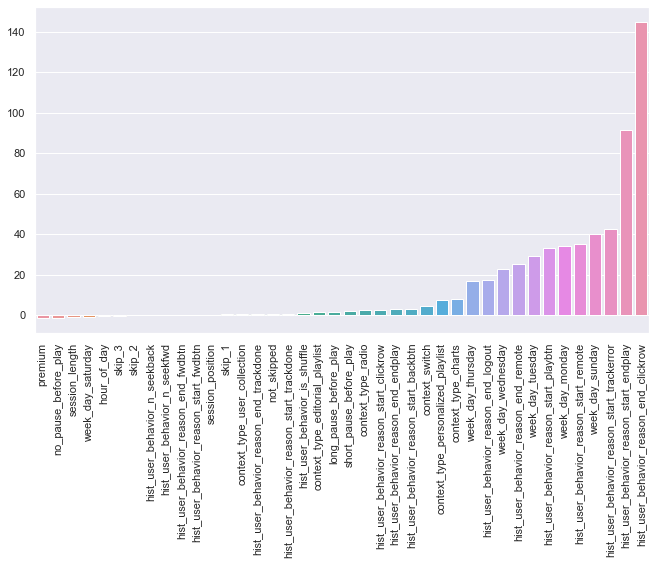

In [73]:
skewed_features_vals=[]

for feature in behavior_features.columns:
    if(feature == "track_id_clean" or feature == "session_id"):
        continue
        
    skewed_features_vals.append([skew(behavior_features[feature]), feature])    
    
skewed_features_vals.sort()

d = {"feature":[], "skew_value":[]}
for x in skewed_features_vals:
    d["feature"].append(x[1])
    d["skew_value"].append(x[0])
    
plt.figure(figsize=(11,6))
sns.barplot(x = d["feature"], y = d["skew_value"])
plt.xticks(rotation=90)
plt.show()

__Feature Scaling & Normalization__

In [74]:
features_to_scale = []

for feature in behavior_features.columns:
    if feature != "session_id" and feature != "track_id_clean":
        features_to_scale.append(feature)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(behavior_features[features_to_scale])

MinMaxScaler()

In [76]:
new_behavior_features = pd.concat([behavior_features[['session_id', 'track_id_clean']].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(behavior_features[features_to_scale]), columns = features_to_scale)],
                    axis = 1)

In [77]:
print("new_behavior_features shape:  ", new_behavior_features.shape)

new_behavior_features shape:   (167880, 42)


In [78]:
new_behavior_features.columns

Index(['session_id', 'track_id_clean', 'session_position', 'session_length',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror',
       'hist_user_behavior_reason_end_clickrow',
       

__Merging Data & Performing PCA__

In [79]:
new_behavior_features = new_behavior_features.rename(columns={"track_id_clean": "track_id"})

In [80]:
merged_data = pd.merge(new_behavior_features , new_acoustic_features, on = "track_id")

In [81]:
merged_data.head()

,session_id,track_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,week_day_monday,week_day_saturday,week_day_sunday,week_day_thursday,week_day_tuesday,week_day_wednesday,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,mode_major
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.695652,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
1,0_00079a23-1600-486a-91bd-5208be0c745a,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.315789,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739130,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.263158,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.913043,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.421053,0.3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.782609,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.315789,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0


In [121]:
merged_data.to_pickle("merged.pkl")

In [82]:
merged_data.shape

(167880, 71)

In [83]:
df = merged_data.drop(columns = ["session_id", "track_id", "skip_2"])

In [84]:
df.head()

,session_position,session_length,skip_1,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,week_day_monday,week_day_saturday,week_day_sunday,week_day_thursday,week_day_tuesday,week_day_wednesday,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,mode_major
0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.695652,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
1,0.315789,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.739130,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
2,0.263158,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.913043,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
3,0.421053,0.3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.782609,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0
4,0.315789,0.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.826087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085367,1.0,0.996808,0.015915,0.442794,0.486798,0.663098,0.236839,0.553533,0.938174,0.003487,0.090909,0.681102,0.866778,0.546784,0.333214,0.072515,0.612616,0.8,0.152256,0.149403,0.775233,0.723667,0.444439,0.361692,0.724188,0.224763,0.55524,1.0


In [86]:
from sklearn.decomposition import PCA

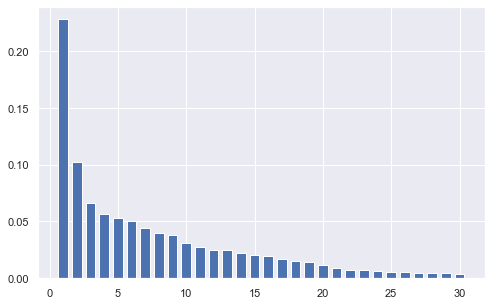

In [87]:
pca = PCA(n_components = 30, random_state = 42)
x_pca = pca.fit_transform(df)
variance = pca.explained_variance_ratio_

plt.bar(x = range(1, len(variance) + 1), height = variance, width = 0.7)
plt.show()

In [88]:
x_pca = pca.transform(df)
df.shape, x_pca.shape

((167880, 68), (167880, 30))

In [89]:
final_df = pd.DataFrame(x_pca)
final_df["skip_2"] = merged_data["skip_2"]

In [90]:
final_df.shape

(167880, 31)